In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

from ema import read

df = read.ax6_summary()
df

,residents_id,accel_date,n_valid_all,avg_inact_mins_all,avg_light_mins_all,avg_mod_mins_all,avg_vig_mins_all,avg_mvpa_mins_all,avg_wake_mins_all,avg_sleep_mins_all,...,zbmi,bmicat,zbmi_change,organised_PA,ph_9_mean,paq_score,PE_related_PA,school_recreational_PA,outside_school_PA,weekend_PA
0,40.0,2022-04-24,4.0,731.687988,228.395996,28.542000,2.000,30.542,990.625000,449.375000,...,0.266155,Healthy weight,0.535745,1.173913,1.857143,2.447895,quite often,1.5,3.5,4.0
1,41.0,2022-04-24,5.0,691.732971,282.450012,35.382999,1.283,36.666,1010.849976,429.149994,...,1.003298,Overweight,-0.117251,1.217391,2.142857,2.151139,I dont do PE,1.5,2.5,4.0
2,42.0,2022-04-24,4.0,958.583008,216.979004,26.958000,0.833,27.791,1203.354004,236.645996,...,-1.037208,Underweight,-2.153997,1.739130,3.000000,1.748792,I dont do PE,1.0,2.0,2.0
3,46.0,2022-04-21,3.0,892.250000,194.722000,21.833000,0.250,22.083,1109.056030,330.944000,...,0.057294,Healthy weight,-0.311795,1.086957,1.857143,1.660455,I dont do PE,1.5,2.0,3.0
4,110.0,2022-04-18,1.0,853.416992,142.667007,23.500000,0.500,24.000,1020.083008,419.916992,...,2.790148,Obese,-0.754868,1.608696,2.857143,1.718426,quite often,1.5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,39814.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.196305,Obese,0.580453,1.347826,2.142857,1.832298,I dont do PE,1.0,2.0,3.0
622,39829.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.547819,Overweight,0.289909,1.043478,1.000000,1.115942,I dont do PE,1.0,1.0,1.0
623,39830.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.504402,Obese,0.243121,1.434783,2.000000,2.603865,quite often,2.0,3.0,4.0
624,39831.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.509202,Healthy weight,0.518500,1.000000,1.000000,1.222222,sometimes,1.0,1.0,1.0


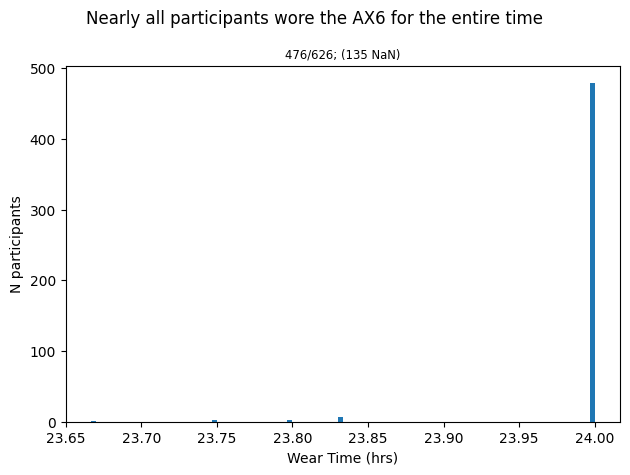

In [3]:
import numpy as np
import matplotlib.pyplot as plt

img_dir = "img/ax6"
if not os.path.isdir(img_dir):
    os.mkdir(img_dir)

col = "avg_wtime_mins_all"

fig, axis = plt.subplots()

weartime_hrs = df[col] / 60
axis.hist(weartime_hrs, bins=100)

axis.set_xlabel("Wear Time (hrs)")
axis.set_ylabel("N participants")

fig.suptitle("Nearly all participants wore the AX6 for the entire time")
axis.set_title(
    f"{(weartime_hrs == 24).sum()}/{len(df)}; ({weartime_hrs.isna().sum()} NaN)",
    fontsize="small",
)

fig.tight_layout()

fig.savefig(f"{img_dir}/ax6_wear_time_hist.png")

In [4]:
"""
Read in the GGIR data

"""
person_summary = read.ax6_person_summary(part=2)

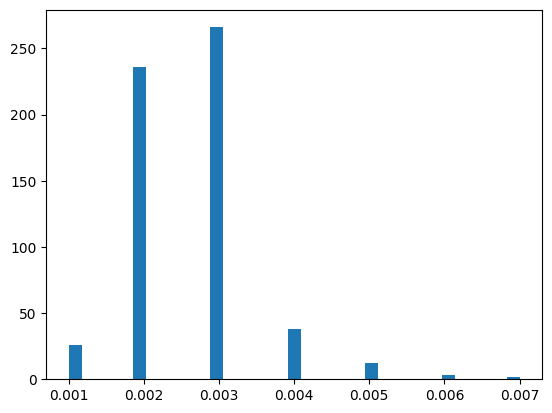

In [10]:
"""
Plot a histogram of GGIR calibration error

"""
_ = plt.hist(person_summary["calib_err"], bins=35)

In [11]:
"""
Summarise the data quality report

"""
data_quality_df = read.ax6_data_quality()

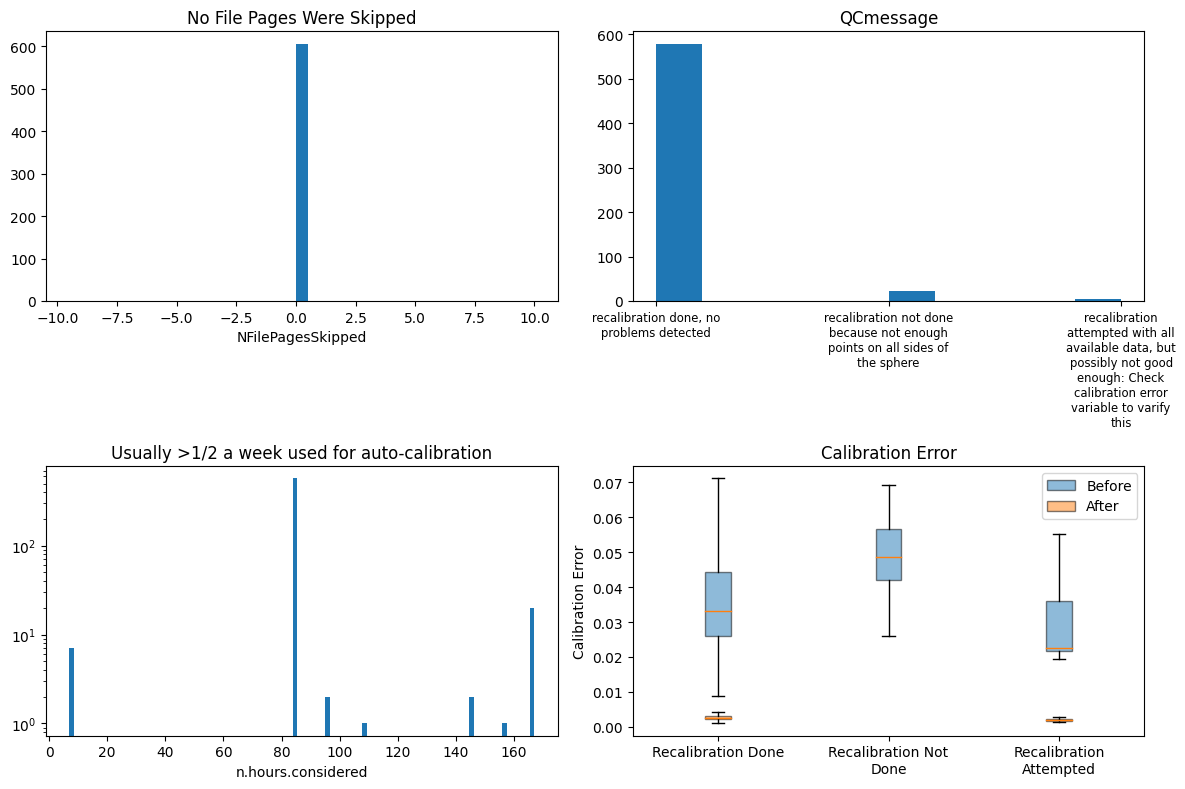

In [57]:
from textwrap import wrap
import pandas as pd

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

col = "NFilePagesSkipped"
axes[0, 0].set_xlabel(col)
axes[0, 0].hist(data_quality_df[col], bins=np.arange(-10, 10, 0.5) + 0.5)
axes[0, 0].set_title("No File Pages Were Skipped")

col = "QCmessage"
axes[0, 1].set_title(col)
axes[0, 1].hist(data_quality_df[col])
axes[0, 1].set_xticks(
    np.arange(0, 3),
    ["\n".join(wrap(label.get_text(), 22)) for label in axes[0, 1].get_xticklabels()],
    ha="center",
    fontsize="small",
)

col = "n.hours.considered"
axes[1, 0].set_xlabel(col)
axes[1, 0].hist(data_quality_df[col], bins=100)
axes[1, 0].set_yscale("log")
data_quality_df[col].value_counts()

start_colour, end_colour = "tab:blue", "tab:orange"
col = "cal.error.end"
for i, value in enumerate(data_quality_df["QCmessage"].unique()):
    error_start = pd.to_numeric(
        data_quality_df["cal.error.start"][data_quality_df["QCmessage"] == value],
        errors="coerce",
    )
    error_end = pd.to_numeric(
        data_quality_df["cal.error.end"][data_quality_df["QCmessage"] == value],
        errors="coerce",
    )
    box1 = axes[1, 1].boxplot(
        error_start, positions=[i], showfliers=False, patch_artist=True
    )
    for box in box1["boxes"]:
        box.set_facecolor(start_colour)
        box.set_alpha(0.5)

    box2 = axes[1, 1].boxplot(
        error_end, positions=[i], showfliers=False, patch_artist=True
    )
    for box in box2["boxes"]:
        box.set_facecolor(end_colour)
        box.set_alpha(0.5)


axes[1, 0].set_title("Usually >1/2 a week used for auto-calibration")

axes[1, 1].set_ylabel("Calibration Error")
axes[1, 1].set_title("Calibration Error")
axes[1, 1].set_xticks(
    range(3),
    [
        "\n".join(wrap(label, 20))
        for label in [
            "Recalibration Done",
            "Recalibration Not Done",
            "Recalibration Attempted",
        ]
    ],
)
axes[1, 1].legend(
    handles=[box1["boxes"][0], box2["boxes"][0]], labels=["Before", "After"]
)

fig.tight_layout()
fig.savefig(f"{img_dir}/ax6_data_quality.png")

In [8]:
"""
Visualise the person-level summary:
    - clipping score
    - Measurement duration
    - Wear duration
    - Completeness score
    - Calibration Status
    - Total number of valid days

"""

'\nVisualise the person-level summary:\n    - clipping score\n    - Measurement duration\n    - Wear duration\n    - Completeness score\n    - Calibration Status\n    - Total number of valid days\n\n'

In [9]:
"""
Visualise the day-level summary:
    - number of hours of measurement
    - number of hours with valid data
    - sleep/wake times as a nice column heatmap thing

"""

'\nVisualise the day-level summary:\n    - number of hours of measurement\n    - number of hours with valid data\n    - sleep/wake times as a nice column heatmap thing\n\n'

In [ ]:
"""
Let's take a closer look at wear duration, since this seems to look different between GGIR and Sophia's output

"""